# 印鑑圖片處理

## 1. Normalized

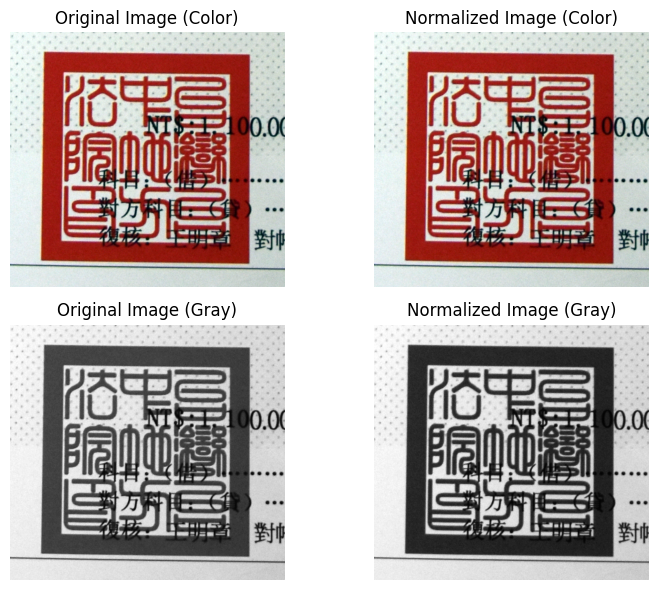

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖片
image = cv2.imread('/Users/jolene/Documents/Competition/AIGO/AI_good/政府單位/台中地院/BG039.png')

# 將圖像轉換為浮點型，以便進行標準化操作
image_float = image.astype(np.float32)

# 標準化操作：將圖像數值縮放到 [0, 1] 範圍內
normalized_image = image_float / 255.0

# 轉換為 RGB 格式（OpenCV 加載的是 BGR 格式）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
normalized_image_rgb = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB)

# 使用 plt.subplot 創建和顯示每個子圖
plt.figure(figsize=(8, 6))

# 第一個子圖：原始彩色圖像
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image (Color)')
plt.axis('off')

# 第二個子圖：標準化彩色圖像
plt.subplot(2, 2, 2)
plt.imshow(normalized_image_rgb)
plt.title('Normalized Image (Color)')
plt.axis('off')

# 第三個子圖：原始灰度圖像
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Original Image (Gray)')
plt.axis('off')

# 第四個子圖：標準化灰度圖像
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(normalized_image_rgb, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Normalized Image (Gray)')
plt.axis('off')

# 顯示結果
plt.tight_layout()
plt.show()


## 2. 二值化處理

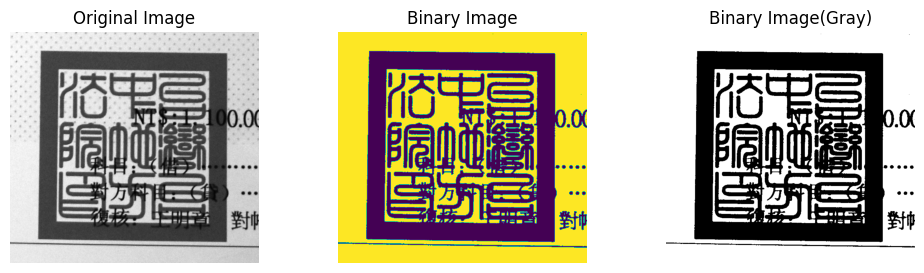

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖片並將其轉換為灰度圖像
image = cv2.imread('/Users/jolene/Documents/Competition/AIGO/AI_good/政府單位/台中地院/BG039.png', cv2.IMREAD_GRAYSCALE)

# 使用固定閾值進行二值化處理（128 作為閾值）
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 3))
# 使用 matplotlib 顯示二值化後的圖像
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_image)
plt.axis('off')
plt.title('Binary Image')

plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.title('Binary Image(Gray)')

plt.show()

## 3. 使用 Mask 提取特定顏色

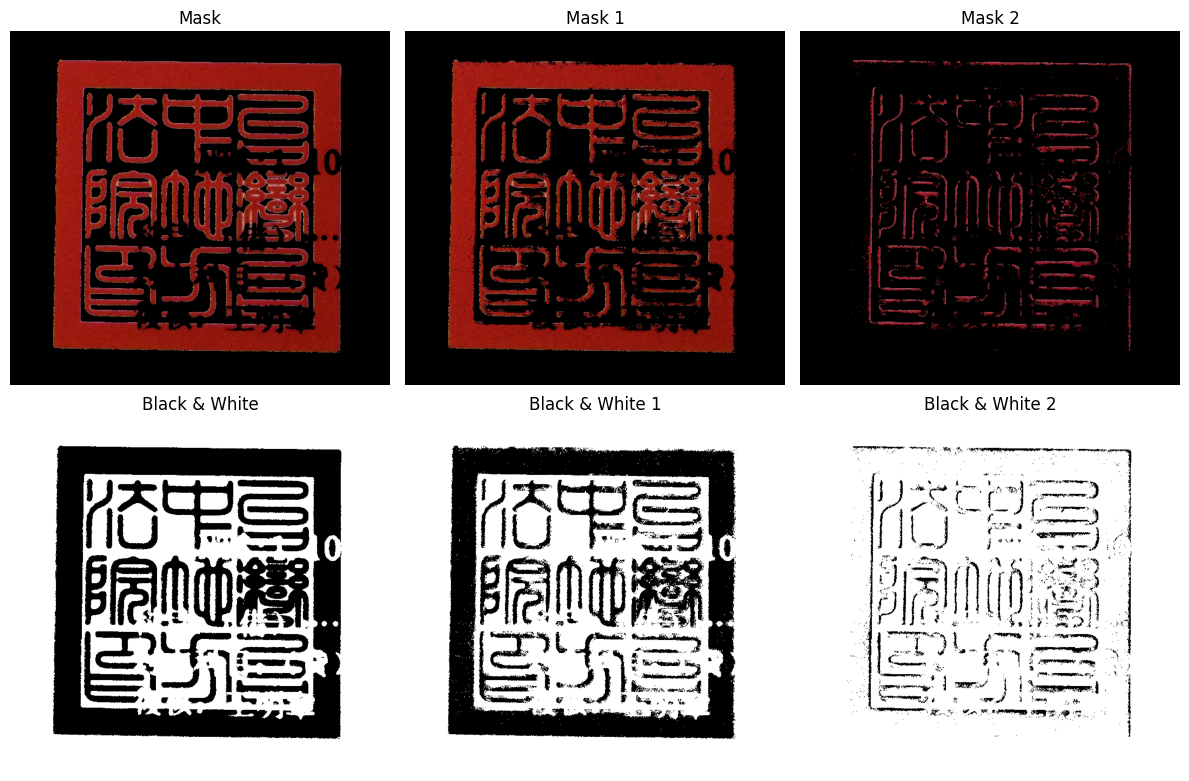

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖片
image = cv2.imread('/Users/jolene/Documents/Competition/AIGO/AI_good/政府單位/台中地院/BG039.png')

# 將圖片從 BGR 轉換到 HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定義紅色的兩個範圍
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# 創建兩個遮罩，並將它們合併
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

# 合併兩個遮罩
mask = mask1 + mask2

# 提取紅色部分
red_part = cv2.bitwise_and(image, image, mask=mask)
red_part1 = cv2.bitwise_and(image, image, mask=mask1)
red_part2 = cv2.bitwise_and(image, image, mask=mask2)

# 反轉遮罩，使紅色部分變黑，背景變白
inverse_mask = cv2.bitwise_not(mask)
inverse_mask1 = cv2.bitwise_not(mask1)
inverse_mask2 = cv2.bitwise_not(mask2)

# 將遮罩應用到白色背景上
white_background = np.ones_like(image) * 255
red_on_white = cv2.bitwise_and(white_background, white_background, mask=inverse_mask)
red_on_white1 = cv2.bitwise_and(white_background, white_background, mask=inverse_mask1)
red_on_white2 = cv2.bitwise_and(white_background, white_background, mask=inverse_mask2)

# 將 BGR 轉換為 RGB（因為matplotlib使用的是RGB格式顯示圖片）
red_part_rgb = cv2.cvtColor(red_part, cv2.COLOR_BGR2RGB)
red_part_rgb1 = cv2.cvtColor(red_part1, cv2.COLOR_BGR2RGB)
red_part_rgb2 = cv2.cvtColor(red_part2, cv2.COLOR_BGR2RGB)

red_on_white_rgb = cv2.cvtColor(red_on_white, cv2.COLOR_BGR2RGB)
red_on_white_rgb1 = cv2.cvtColor(red_on_white1, cv2.COLOR_BGR2RGB)
red_on_white_rgb2 = cv2.cvtColor(red_on_white2, cv2.COLOR_BGR2RGB)

# 使用 matplotlib 顯示圖片，2*3 格式
plt.subplots(2, 3, figsize=(12, 8))

# 第一行：原始遮罩效果
plt.subplot(2, 3, 1)
plt.imshow(red_part_rgb)
plt.axis('off')
plt.title('Mask')

plt.subplot(2, 3, 2)
plt.imshow(red_part_rgb1)
plt.axis('off')
plt.title('Mask 1')

plt.subplot(2, 3, 3)
plt.imshow(red_part_rgb2)
plt.axis('off')
plt.title('Mask 2')

# 第二行：黑白轉換後的效果
plt.subplot(2, 3, 4)
plt.imshow(red_on_white_rgb)
plt.axis('off')
plt.title('Black & White')

plt.subplot(2, 3, 5)
plt.imshow(red_on_white_rgb1)
plt.axis('off')
plt.title('Black & White 1')

plt.subplot(2, 3, 6)
plt.imshow(red_on_white_rgb2)
plt.axis('off')
plt.title('Black & White 2')

plt.tight_layout()
plt.show()


> 本專案主要針對印鑑圖像進行處理。在底圖不乾淨的情況下，若僅使用標準化或二值化等常見的影像處理方法，容易遺留大量雜訊。由於印鑑通常呈現紅色，因此本專案採用紅色提取技術作為前處理方法，以有效去除背景雜訊，強調印鑑的顏色特徵。